<a href="https://colab.research.google.com/github/brach22/MachineLearning340/blob/main/Copy_of_FashionMNISTChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification Challenge

CSC/DSC 340 Week 10 & 11 Combined Assignment

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023


The goal of this assignment is to create the most accurate classifier you can for the "Fashion MNIST" data set, which is imported below.

Rules:
1. You can train your model with as much of the training data set as you want, but you must report your test accuracy using the entire test data set
2. You cannot use the test data set in your training or validation data sets
3. You accuracy must be reported as the average and standard deviation of five different trainings **AND** must be reproducible

**Deadlines:**
* An update is due before class on October 30. This update must contain your group member names, your current average accuracy, and your current best model architecture. Submit this report as a Word document.
* Your final code is due on November 8 before the start of class.

**EDIT THIS CELL BEFORE TURNING IN THE NOTEBOOK**

Average Accuracy of Best Model:

Standard Deviation of Best Model:

Summary of Best Model:

# Importing Dataset
- from tensorflow

In [1]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras import layers, models

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

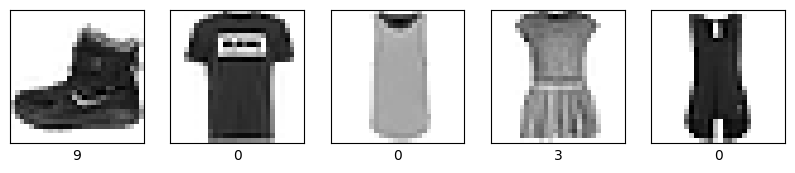

In [3]:
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Shorten Training Set
Reduce size for Runtime

Check for class imbalances using histogram

(28, 28) --> pixels (image size)

10 classes


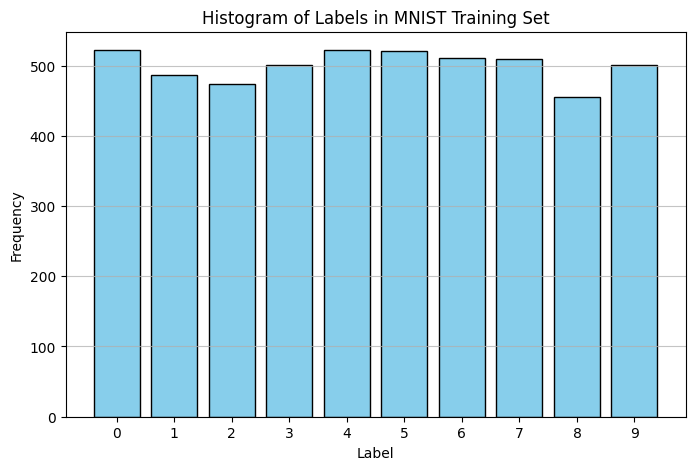

In [4]:
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Model 1

## Model and Compiling

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit and Accuracy

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 73s 37ms/step - loss: 0.4933 - accuracy: 0.8174
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3215 - accuracy: 0.8819
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2750 - accuracy: 0.8996
Epoch 4/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2478 - accuracy: 0.9078
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2232 - accuracy: 0.9184
313/313 - 3s - loss: 0.2577 - accuracy: 0.9067 - 3s/epoch - 9ms/step

Test accuracy: 0.9067000150680542


## Confusion Matrix

313/313 [==============================] - 4s 13ms/step


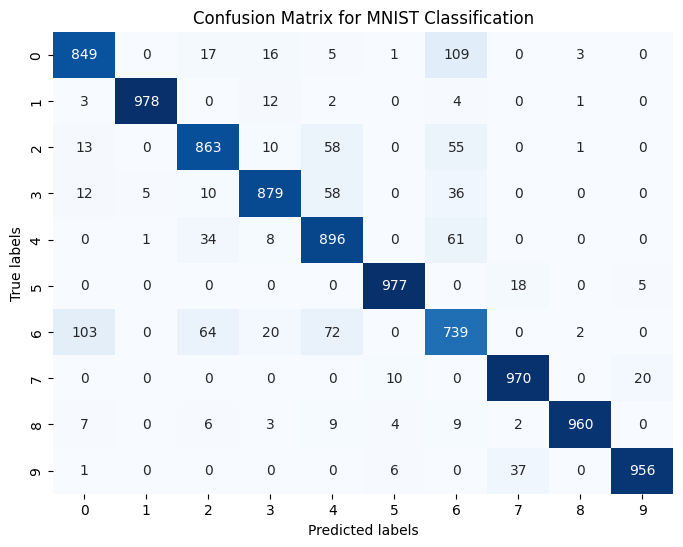

In [7]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

# Model 2

## Model and Compiling

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit and Accuracy

In [9]:
# Train the model
model.fit(train_images, train_labels, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 64s 32ms/step - loss: 0.5617 - accuracy: 0.7913
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3606 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3073 - accuracy: 0.8874
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2764 - accuracy: 0.8995
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2533 - accuracy: 0.9061
313/313 - 3s - loss: 0.2734 - accuracy: 0.9010 - 3s/epoch - 9ms/step

Test accuracy: 0.9010000228881836


## Confusion Matrix

313/313 [==============================] - 3s 10ms/step


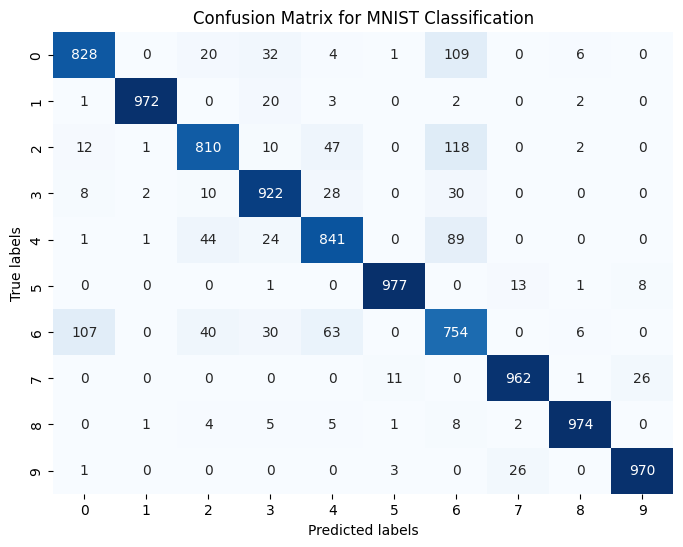

In [10]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

# Model 3

## Model and Compiling

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit and Accuracy

In [12]:
# Train the model
model.fit(train_images, train_labels, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 139s 73ms/step - loss: 0.5168 - accuracy: 0.8105
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.3317 - accuracy: 0.8785
Epoch 3/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2840 - accuracy: 0.8958
Epoch 4/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2524 - accuracy: 0.9079
Epoch 5/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.2283 - accuracy: 0.9159
313/313 - 5s - loss: 0.2617 - accuracy: 0.9071 - 5s/epoch - 17ms/step

Test accuracy: 0.9071000218391418


## Confusion Matrix

313/313 [==============================] - 5s 15ms/step


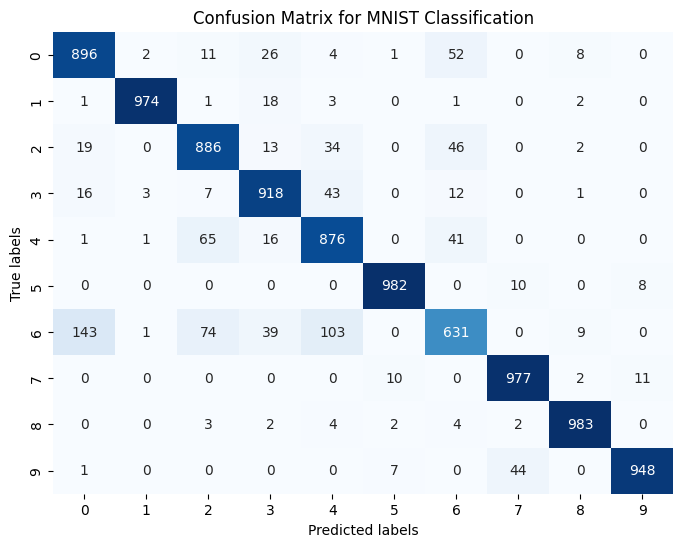

In [13]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()